## Filter design in Python with MNE package




I will make filters for the script to collect them for topological data analysis of Hp state based on LFP.  The script that uses them is LFP_Hp_State_TDA_ABI_data/LFP_data_extractor.py.  The frequency bands will have the following definitions: Delta (1–5 Hz), theta (6–10 Hz), beta (10–20 Hz), slow gamma (20–45 Hz), fast gamma (60–90 Hz), and ripple band (100-250).  Based on a combination of definitons from Esparza et al., (2023) and Modi et al., (2023.).

In [6]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import scipy
from scipy import stats, signal
from mne.time_frequency.tfr import morlet
from mne.viz import plot_filter, plot_ideal_filter

In [7]:
import os
import subprocess
import numpy as np
from scipy import io, signal

# from fitter import Fitter, get_common_distributions, get_distributions
import scipy.ndimage
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

# for ripple detection
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_filter1d
from scipy import stats
from scipy import interpolate
from scipy.signal import firwin, lfilter

In [8]:
# setting paths to filters
swr_detection_filters_path = "/home/acampbell/Stienmetz2019Reanalyzed/PowerBandFilters/swr_detection_script_filters_1500Hz"

In [9]:
def resample_signal(signal, times, new_rate):
    """
    Resample a 2D signal array to a new sampling rate.

    Parameters:
    signal (np.array): 2D array where each column is a source and each row is a time point.
    times (np.array): 1D array of times corresponding to the rows of the signal array.
    new_rate (float): The new sampling rate in Hz.

    Returns:
    new_signal (np.array): The resampled signal array.
    new_times (np.array): The times corresponding to the rows of the new signal array.
    """
    nsamples_new = int(len(times) * new_rate / (len(times) / times[-1]))
    new_times = np.linspace(times[0], times[-1], nsamples_new)
    new_signal = np.zeros((nsamples_new, signal.shape[1]))

    for i in range(signal.shape[1]):
        interp_func = interpolate.interp1d(
            times, signal[:, i], bounds_error=False, fill_value="extrapolate"
        )
        new_signal[:, i] = interp_func(new_times)

    return new_signal, new_times

## Loading the testing data

In [10]:
input_dir = (
    "/space/scratch/allen_visbehave_swr_data/ca1_lfp_example_for_filter_building"
)

# Load the numpy array from the compressed file
data = np.load(input_dir + "/lfp_ca1.npz")

# Access the 'lfp_ca1' array
lfp_ca1 = data["lfp_ca1"]

In [11]:
"""
url : https://mne.tools/dev/generated/mne.filter.create_filter.html
mne.filter.create_filter(data, sfreq, l_freq, h_freq, filter_length='auto', l_trans_bandwidth='auto',
                         h_trans_bandwidth='auto', method='fir', iir_params=None, phase='zero', 
                         fir_window='hamming', fir_design='firwin', verbose=None)
"""

"\nurl : https://mne.tools/dev/generated/mne.filter.create_filter.html\nmne.filter.create_filter(data, sfreq, l_freq, h_freq, filter_length='auto', l_trans_bandwidth='auto',\n                         h_trans_bandwidth='auto', method='fir', iir_params=None, phase='zero', \n                         fir_window='hamming', fir_design='firwin', verbose=None)\n"

In [12]:
times_1250Hz = np.arange(0, lfp_ca1.shape[0] / 1000, 1 / 1000)

In [13]:
lfp_ca1_1500hz, lfp_ca1_1500hz_times = resample_signal(
    lfp_ca1, times_1250Hz, new_rate=1500
)

In [14]:
"""

save_dir = '/space/scratch/allen_visbehave_swr_data/ca1_lfp_example_for_filter_building'

# Load the numpy array from the compressed file
data = np.load(save_dir + '/lfp_ca1.npz')

# Access the 'lfp_ca1' array
lfp_ca1 = data['lfp_ca1']
times_1250Hz =  np.arange(0, lfp_ca1.shape[0]/1000, 1/1000)

lfp_ca1_1500hz, lfp_ca1_1500hz_times = resample_signal(lfp_ca1, times_1250Hz, new_rate= 1000)

test_filter = mne.filter.create_filter(lfp_ca1_1500hz[0:10000,0], 1000, l_freq=1, h_freq=5, fir_design='firwin')



Setting up band-pass filter from 1 - 5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 5.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Filter length: 3301 samples (3.301 s)
"""

"\n\nsave_dir = '/space/scratch/allen_visbehave_swr_data/ca1_lfp_example_for_filter_building'\n\n# Load the numpy array from the compressed file\ndata = np.load(save_dir + '/lfp_ca1.npz')\n\n# Access the 'lfp_ca1' array\nlfp_ca1 = data['lfp_ca1']\ntimes_1250Hz =  np.arange(0, lfp_ca1.shape[0]/1000, 1/1000)\n\nlfp_ca1_1500hz, lfp_ca1_1500hz_times = resample_signal(lfp_ca1, times_1250Hz, new_rate= 1000)\n\ntest_filter = mne.filter.create_filter(lfp_ca1_1500hz[0:10000,0], 1000, l_freq=1, h_freq=5, fir_design='firwin')\n\n\n\nSetting up band-pass filter from 1 - 5 Hz\n\nFIR filter parameters\n---------------------\nDesigning a one-pass, zero-phase, non-causal bandpass filter:\n- Windowed time-domain design (firwin) method\n- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation\n- Lower passband edge: 1.00\n- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)\n- Upper passband edge: 5.00 Hz\n- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequenc

Ahbijit note: some parameters worth finicking with are...
h_trans_bandwidth, l_trans_bandwidth,  this will change the lower and higher filter,
also change the filter length parameter, to increase the stopband attenuation 

In order to increase the dB stopband attnuation increase filter length (not nexcissarily hamming window params)

Anything in the stop band is supressed, you can see it in the freq response plot.  In the middle plot, the 
frequencies of interest are at 0.  WHereas everything else is showing stong suppression.

THE MOST IMPORTANT THING:  The middle plot on on plot_filter is the frequency resposne plot.  It tells you everything you need to know
about teh quality of your filter.  If it doesn't look good go back and change some parameters try a new filter design etc etc.

### Theta Band (6-10) 

In [15]:
theta_1500hz_filter = mne.filter.create_filter(
    lfp_ca1_1500hz[0:15000, 0],
    sfreq=1500,
    l_freq=6,
    h_freq=10,
    filter_length="auto",
    h_trans_bandwidth=1.0,
    l_trans_bandwidth=1.0,
    fir_design="firwin",
)

Setting up band-pass filter from 6 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 6.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 5.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Filter length: 4951 samples (3.301 s)



In [16]:
theta_1500hz_filter

array([4.49072359e-06, 4.90178367e-06, 5.29747733e-06, ...,
       5.29747733e-06, 4.90178367e-06, 4.49072359e-06])

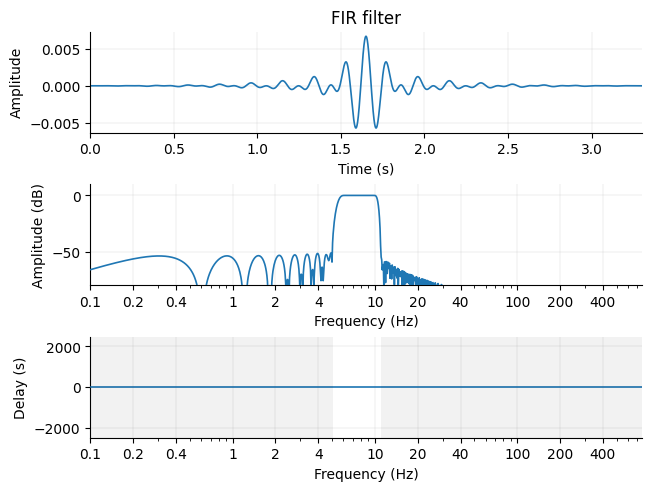

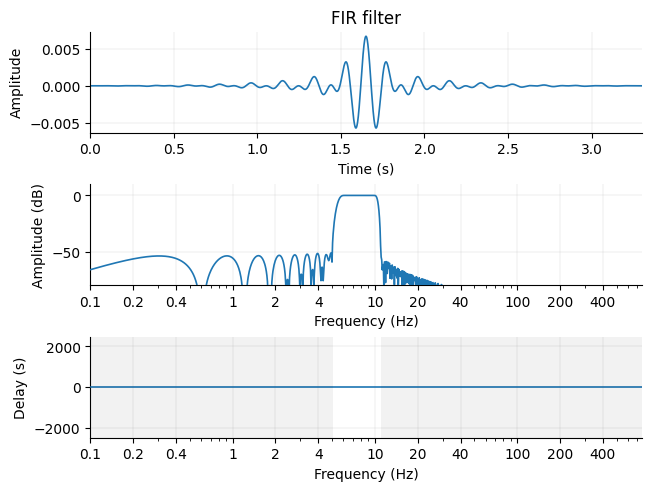

In [17]:
plot_filter(theta_1500hz_filter, sfreq=1500)

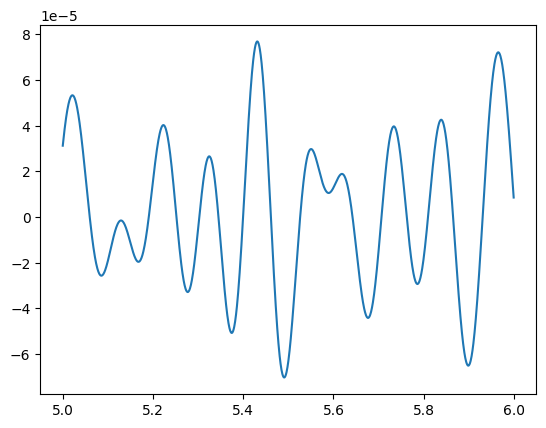

In [18]:
theta_1500hz_band = np.convolve(
    lfp_ca1_1500hz[0:15000, 0], theta_1500hz_filter, mode="same"
)

plt.plot(lfp_ca1_1500hz_times[7500:9000], theta_1500hz_band[7500:9000])
plt.show()

### General Gamma (20-80)  defined in Frank et al., (2008)

This is defined based on the publication Cheng, S., & Frank, L. M. (2008). New experiences enhance coordinated neural activity in the hippocampus. Neuron, 57(2), 303-313.  The frequency and SD threshold is stated in supplemental material in the text of figure S13.

In [19]:
frank2008_gamma_1500hz_filter = mne.filter.create_filter(
    lfp_ca1_1500hz[0:15000, 0],
    sfreq=1500,
    l_freq=20,
    h_freq=80,
    filter_length="auto",
    h_trans_bandwidth=1.0,
    l_trans_bandwidth=1.0,
    fir_design="firwin",
)

Setting up band-pass filter from 20 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 20.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 19.50 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 80.50 Hz)
- Filter length: 4951 samples (3.301 s)



In [20]:
frank2008_gamma_1500hz_filter

array([-1.83360913e-05, -1.89612791e-05, -1.83793062e-05, ...,
       -1.83793062e-05, -1.89612791e-05, -1.83360913e-05])

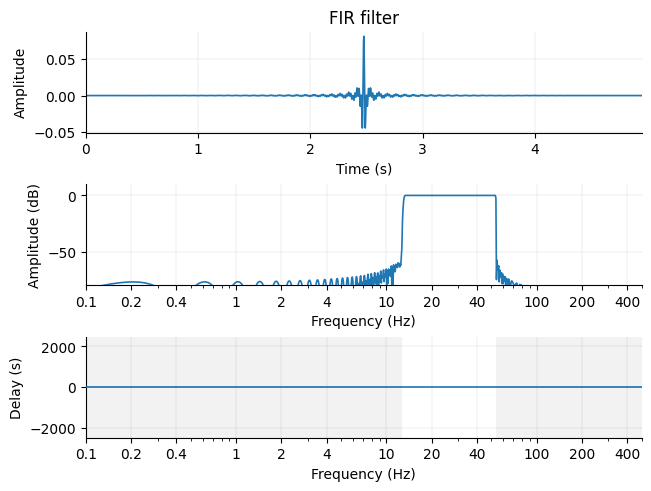

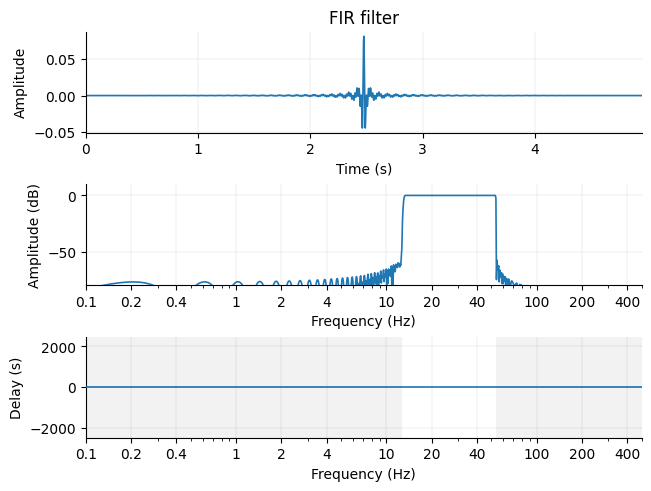

In [21]:
plot_filter(frank2008_gamma_1500hz_filter, sfreq=1000)

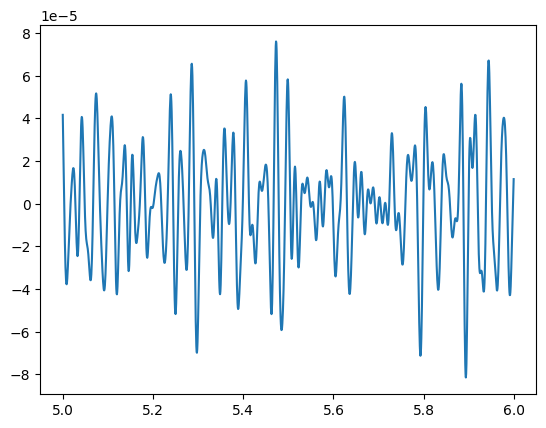

In [22]:
frank2008_gamma_1500hz_band = np.convolve(
    lfp_ca1_1500hz[0:15000, 0], frank2008_gamma_1500hz_filter, mode="same"
)

plt.plot(lfp_ca1_1500hz_times[7500:9000], frank2008_gamma_1500hz_band[7500:9000])
plt.show()

## Sharp Wave Component Band (8-40Hz)

Frquency was chosen based on supplemental figure S5B in [Fernández-Ruiz, A., Oliva, A., Fermino de Oliveira, E., Rocha-Almeida, F., Tingley, D., & Buzsáki, G. (2019). Long-duration hippocampal sharp wave ripples improve memory. Science, 364(6445), 1082-1086.](https://pmc.ncbi.nlm.nih.gov/articles/PMC6693581/)

In [23]:
sharpwave_componenet_8to40band_1500hz_filter = mne.filter.create_filter(
    lfp_ca1_1500hz[0:15000, 0],
    sfreq=1500,
    l_freq=8,
    h_freq=40,
    filter_length="auto",
    h_trans_bandwidth=1.0,
    l_trans_bandwidth=1.0,
    fir_design="firwin",
)

Setting up band-pass filter from 8 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 40.50 Hz)
- Filter length: 4951 samples (3.301 s)



In [24]:
sharpwave_componenet_8to40band_1500hz_filter

array([-1.64399145e-05, -1.73288897e-05, -1.79290381e-05, ...,
       -1.79290381e-05, -1.73288897e-05, -1.64399145e-05])

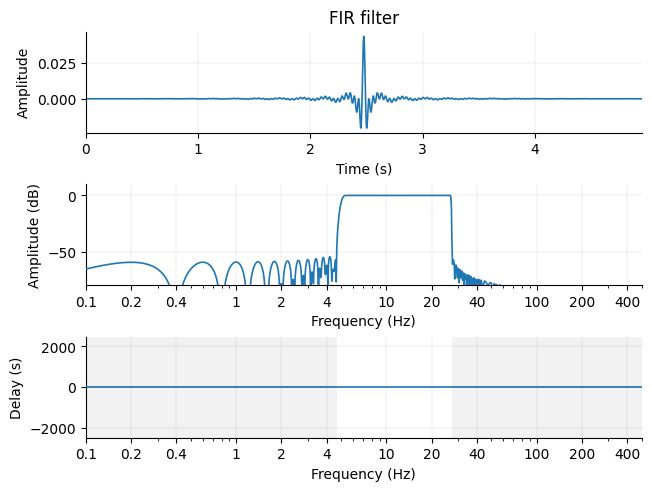

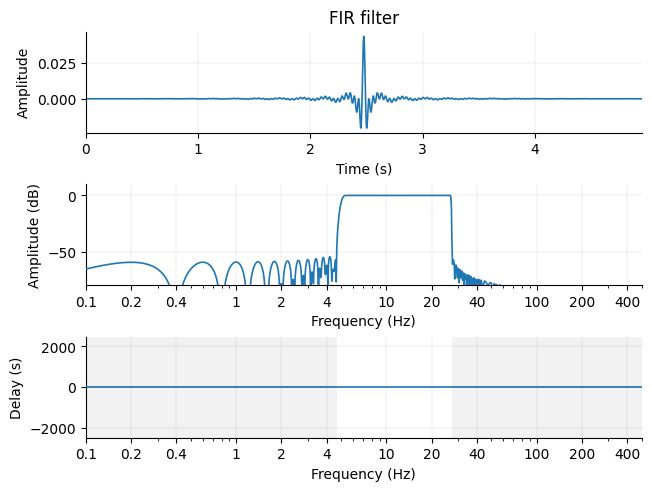

In [25]:
plot_filter(sharpwave_componenet_8to40band_1500hz_filter, sfreq=1000)

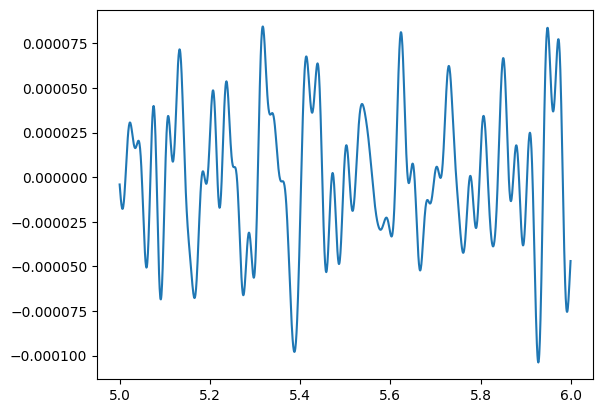

In [26]:
sharpwave_componenet_8to40band_1500hz_band = np.convolve(
    lfp_ca1_1500hz[0:15000, 0], sharpwave_componenet_8to40band_1500hz_filter, mode="same"
)

plt.plot(lfp_ca1_1500hz_times[7500:9000], sharpwave_componenet_8to40band_1500hz_band[7500:9000])
plt.show()

In [28]:
np.savez(
    'sharpwave_componenet_8to40band_1500hz_band.npz',
    sharpwave_componenet_8to40band_1500hz_band=sharpwave_componenet_8to40band_1500hz_band
)

In [25]:
# saving it...
swr_detection_filters = {
    "frank2008_gamma_1500hz": frank2008_gamma_1500hz_filter,
    "theta_1500hz": theta_1500hz_filter,
}

for band in swr_detection_filters.keys():
    filename = f"{band}_bandpass_filter.npz"
    np.savez_compressed(
        os.path.join(swr_detection_filters_path, filename), swr_detection_filters[band]
    )